## Генерация почти случайных временных рядов 

In [2]:
import scipy as sp
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

## Inputs:
**period_len** - a number of events to generate. It's recommended to use values from 10000 to 10000000. If less - try to set **length_random** as *False* and set a **length** to a lesser values (e.g. up to 100). If you set more than 10 million, it may cause a memory overflow

**length** - length of a single sub-period where function outputs are equal. 

**default_dir**(default == 'Still') - the direction of a first change. For now it's not very useful because thre are many decisions of directions. This parameter most likely will be deprecated if decision-making logic will not change dramatically. Values: 'Still', 'Down' and 'Up'.

**still_prob**(optional, default == 0.5) - a probability of 'Still' direction choice for each next step. This is an attempt to provide a variety to series. This is implemented because each step direction depends on previous direction, so this parameter tries to reset previous trend and give series a chance to statr a new one.

**deviation**(default == 1) - used to calculate _step_ as choice from *np.linspace(0, dev * 2, 100)*, based on normal distibution, so step is normally distributed around **deviation**/**length**, and remains unchanged during all the process of series generating

**length_random** (optional, default == False) - flag of randomizing _step_. If _True_,  _step_ is calculated as _np.random.randint(period_len/10000, period_len/1000)_. NOTE: this is imperfect for generating short series (lesser than 10000 points), but works for long ones

**direction_random** (optional, default == False) - flag of randomizing _direction_. If  == True,  **default_dir** is ignored and first direction has equal chances for all thee options

In [3]:
def generate_series(period_len, length, default_dir = 'Still', still_prob = 0.5,
                    deviation = 1, 
                    length_random = False,
                    direction_random = False):
    '''period_len - количество точек, которые необходимо сгенерировать
length - длина одного периода монотонного изменения, в точках (одинакова для всего кол-ва точек)
default_dir - направление первого изменения (принимает значения:{'Still', 'Down', 'Up'}, по умолчанию = 'Still')
deviation - величина отклонения на каждом шаге (задается случайно из диапазона [0, dev*2], одинакова )
length_random_ - флаг случайного выбора шага. Если == True, то __length__ игнорируется, по умолчанию = False
direction_random - флаг случайного выбора направление. Если == True, то __default_dir__ игнорируется, по умолчанию = False
still_prob - вероятность того, что следующий шаг будет в направлении 'Still' и ряд останется без изменения на протяжении следующего шага

На выходе функция выдает ряд чисел длиной в period_len'''
    period_len = int(period_len)
    directions_dict = {'Still':1/3, 'Down':1/3, 'Up':1/3}
    directions_list = []
    def dir_prob (dirs):
        if dirs[-1] == 'Still':
            directions_dict = {'Still': still_prob,
                               'Down':  (1 - still_prob)/2,
                               'Up':    (1 - still_prob)/2}
        elif dirs[-1] == 'Down':
            directions_dict = {'Still': still_prob,
                               'Down':  (1 - still_prob)/10*8,
                               'Up':    (1 - still_prob)/10*2}
        else: 
            directions_dict = {'Still': still_prob,
                               'Down':  (1 - still_prob)/10*2,
                               'Up':    (1 - still_prob)/10*8}
        dirs = np.random.choice(list(directions_dict.keys()), p = list(directions_dict.values()))
        return dirs
    
    # Блок создания пустого массива значений отклонения
    if length_random == True:
        length = np.random.randint(period_len/10000, period_len/1000)
    series = np.zeros(period_len + length*2) #
       
    ## Step calculation
    values_range = np.linspace(0, deviation, 100)
    values_probs = sts.norm().pdf(values_range) / np.sum(sts.norm().pdf(values_range))
    step = np.random.choice(values_range, p = values_probs)/length
    
    # row below is used for debug
    # probs_table = pd.DataFrame([values_range, values_probs]).transpose()

    # Блок выбора направления изменения
    n_points = int((period_len + length*2)/length)
    for i in range(n_points):
        if i == 0:
            if direction_random == True:
                direction = np.random.choice(list(directions_dict.keys()), p = list(directions_dict.values()))
            else:
                direction = default_dir
        else:
            direction = dir_prob(directions_list)
        directions_list.append(direction)
        last_index = i * length
        
    # Блок генерации ряда
        for j in range(last_index, last_index + length):
            if directions_list[-1] == 'Still':
                series[j] = series[j-1]
            elif directions_list[-1] == 'Down':
                series[j] = series[j-1] - step
            else:
                series[j] = series[j-1] + step
    return series[:period_len]
        

# Test

Wall time: 849 ms


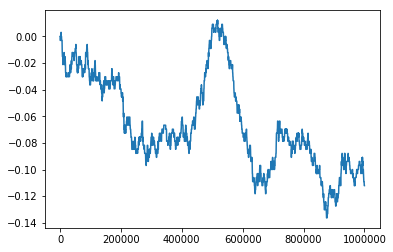

In [4]:
%%time
#plt.figure(figsize=(15,10))
plt.plot(generate_series (1e6, 100, 'Still', .9,deviation = .1, length_random = False))